## Predicting Crime in Los Angeles
Capstone 1 Project - Step 1: Data Wrangling

Notebook by Oliver Bohler

## Importing the neccessary libraries and display settings

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn Style
sns.set()

GrayO = ["orange","black","gray",'yellow','blue','red']
sns.set_palette(GrayO)

# Ensure High Res inline Display of Matplotlib Plots
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Allow for wider and longer table display
pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

## Importing the Data
In the following steps I am loading both data sets and ensuring that their columns and data types match before concatenating them into one main dataframe that will be used for the remainder of this project.

In [375]:
crimes_2010_2019 = '/Users/oliverbohler/Desktop/Springboard/capstone project 2 violent crime in los angeles/Crime_Data_From_2010_to_2019.csv'

crimes_10_to_19 = pd.read_csv(crimes_2010_2019)

crimes_10_to_19.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [376]:
crimes_10_to_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122794 entries, 0 to 2122793
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [377]:
crimes_10_to_19.shape

(2122794, 28)

In [378]:
crimes_2020_2024 = '/Users/oliverbohler/Desktop/Springboard/capstone project 2 violent crime in los angeles/Crime_Data_From_2020_to_Present.csv'

crimes_20_to_present = pd.read_csv(crimes_2020_2024)

crimes_20_to_present.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [379]:
crimes_20_to_present.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           932140 non-null  int64  
 1   Date Rptd       932140 non-null  object 
 2   DATE OCC        932140 non-null  object 
 3   TIME OCC        932140 non-null  int64  
 4   AREA            932140 non-null  int64  
 5   AREA NAME       932140 non-null  object 
 6   Rpt Dist No     932140 non-null  int64  
 7   Part 1-2        932140 non-null  int64  
 8   Crm Cd          932140 non-null  int64  
 9   Crm Cd Desc     932140 non-null  object 
 10  Mocodes         801530 non-null  object 
 11  Vict Age        932140 non-null  int64  
 12  Vict Sex        807934 non-null  object 
 13  Vict Descent    807924 non-null  object 
 14  Premis Cd       932130 non-null  float64
 15  Premis Desc     931578 non-null  object 
 16  Weapon Used Cd  321339 non-null  float64
 17  Weapon Des

In [380]:
crimes_20_to_present.shape

(932140, 28)

In [381]:
combined_reports = pd.concat([crimes_10_to_19, crimes_20_to_present], ignore_index= True)
combined_reports.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


## Dropping and renaming columns
For easier understanding and coding I am renaming column names, drop columns that are not of interest and convert the 'Date Occured' column into datetime.

In [382]:
combined_reports.rename(columns = {'LOCATION': 'Location','Crm Cd' : 'Crime Code', 'Crm Cd Desc': 'Crime Code Description',
                                   'Premis Cd': 'Premis Code', 'AREA NAME': 'Area Name',
                                   'DATE OCC': 'Date Occured', 'TIME OCC': 'Time Occured','LAT': 'Lat','LON': 'Lon'}, inplace = True)

combined_reports = combined_reports.drop(columns =['DR_NO','Part 1-2','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4', 'Date Rptd','Rpt Dist No','Mocodes'])
combined_reports.drop(columns =[col for col in combined_reports.columns if 'AREA' in col], inplace=True)
combined_reports['Date Occured']= pd.to_datetime(combined_reports['Date Occured'])

combined_reports['Date Occured'] = combined_reports['Date Occured'].dt.date
combined_reports['Date Occured']= pd.to_datetime(combined_reports['Date Occured'])

combined_reports.head()
combined_reports.dtypes

/var/folders/0z/41_yxdy57v5gqbv0vhg6ky780000gn/T/ipykernel_45020/3118325241.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_reports['Date Occured']= pd.to_datetime(combined_reports['Date Occured'])


Date Occured              datetime64[ns]
Time Occured                       int64
Area Name                         object
Crime Code                         int64
Crime Code Description            object
Vict Age                           int64
Vict Sex                          object
Vict Descent                      object
Premis Code                      float64
Premis Desc                       object
Weapon Used Cd                   float64
Weapon Desc                       object
Status                            object
Status Desc                       object
Location                          object
Cross Street                      object
Lat                              float64
Lon                              float64
dtype: object

## Extracting year, month, day and weekday name from 'Date Occured" column

In [383]:
def move_column(df, column_name, new_position):
    """
    Move a column to a new position in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to move.
    column_name (str): The name of the column to move.
    new_position (int): The index where the column should be moved.

    Returns:
    pd.DataFrame: The DataFrame with the column moved.
    """
    cols = df.columns.tolist()
    cols.insert(new_position, cols.pop(cols.index(column_name)))
    return df[cols]

In [384]:
def split_date(df,dt_col,prefix=False):
    """
    This function adds split date columns (year, month, day) to the dataframe. This is an inplace function.
    """
    if prefix:
        prefix = prefix
    else:
        prefix = ''
    df.loc[:,prefix + 'year'] = df.loc[:,dt_col].dt.year
    df.loc[:,prefix + 'month'] = df.loc[:,dt_col].dt.month
    df.loc[:,prefix + 'day'] = df.loc[:,dt_col].dt.day

In [385]:
split_date(combined_reports, 'Date Occured')

In [386]:
cols = list(combined_reports.columns)
new_order = cols[:4] + ['year', 'month', 'day'] + cols[4:-3]
combined_reports = combined_reports[new_order]

combined_reports['Weekday'] = combined_reports['Date Occured'].dt.day_name()
combined_reports = move_column(combined_reports, 'Weekday', 7)
combined_reports.head()

,Date Occured,Time Occured,Area Name,Crime Code,year,month,day,Weekday,Crime Code Description,Vict Age,Vict Sex,Vict Descent,Premis Code,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Location,Cross Street,Lat,Lon
0,2010-02-20,1350,Newton,900,2010,2,20,Saturday,VIOLATION OF COURT ORDER,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695
1,2010-09-12,45,Pacific,740,2010,9,12,Sunday,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,2010-08-09,1515,Newton,946,2010,8,9,Monday,OTHER MISCELLANEOUS CRIME,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524
3,2010-01-05,150,Hollywood,900,2010,1,5,Tuesday,VIOLATION OF COURT ORDER,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,2010-01-02,2100,Central,122,2010,1,2,Saturday,"RAPE, ATTEMPTED",47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488


## Checking for duplicates

In [387]:
duplicates = combined_reports[combined_reports.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)
    duplicate_count = duplicates.shape[0]
    print(f"Number of duplicate rows: {duplicate_count}")
    
    # Drop duplicates
    combined_reports = combined_reports.drop_duplicates()
    print(f"All {duplicate_count} duplicates have been dropped")

Duplicates found:
        Date Occured  Time Occured   Area Name  Crime Code  year  month  day  \
663       2010-01-14          2035     Central         623  2010      1   14   
729       2010-01-14          1200     Central         946  2010      1   14   
1039      2010-02-07          1415     Central         860  2010      2    7   
1075      2010-02-13           330     Central         510  2010      2   13   
1464      2010-03-06          1015     Central         510  2010      3    6   
...              ...           ...         ...         ...   ...    ...  ...   
3054383   2024-01-09           225     Mission         230  2024      1    9   
3054512   2024-01-31          1745     Central         888  2024      1   31   
3054719   2024-01-31           645     Central         888  2024      1   31   
3054841   2024-01-17          1820     Central         888  2024      1   17   
3054849   2024-02-16          1625  Hollenbeck         230  2024      2   16   

           Weekday   

In [388]:
combined_reports.shape

(3043771, 22)

## Organizing the Dataframe
It is essential to focus on subgroups of different columns due to the vast amaount of different codes. The first step is to split our Areas into grouped Zones (There will be 4 main zones: Westside & Wilshire, Hollywood/Greater Downtown area, San Fernando Valley and South LA). Note that these zones can be adjusted on preference. 
Further I will group different crimes, weapons and premises into subgroups.

In [389]:
area_to_zone = {'West LA': 'Westside & Wilshire', 'Pacific': 'Westside & Wilshire', 'Wilshire': 'Westside & Wilshire', 'Olympic': 'Hollywood/Greater Downtown Area' , 'Southwest': 'South LA','Hollywood': 'Hollywood/Greater Downtown Area',
               'Topanga': 'San Fernando Valley', 'Van Nuys': 'San Fernando Valley', 'West Valley': 'San Fernando Valley', 'N Hollywood': 'San Fernando Valley', 'Devonshire': 'San Fernando Valley', 'Foothill': 'San Fernando Valley',
                'Mission': 'San Fernando Valley', 'Southeast': 'South LA', '77th Street': 'South LA', 'Newton': 'South LA', 'Rampart': 'Hollywood/Greater Downtown Area', 'Central': 'Hollywood/Greater Downtown Area',
               'Northeast': 'Hollywood/Greater Downtown Area', 'Harbor': 'South LA', 'Hollenbeck': 'Hollywood/Greater Downtown Area'}

combined_reports.loc[:,'Zone'] = combined_reports['Area Name'].map(area_to_zone)

combined_reports = move_column(combined_reports, 'Zone', 3)

combined_reports.head()

,Date Occured,Time Occured,Area Name,Zone,Crime Code,year,month,day,Weekday,Crime Code Description,Vict Age,Vict Sex,Vict Descent,Premis Code,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Location,Cross Street,Lat,Lon
0,2010-02-20,1350,Newton,South LA,900,2010,2,20,Saturday,VIOLATION OF COURT ORDER,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695
1,2010-09-12,45,Pacific,Westside & Wilshire,740,2010,9,12,Sunday,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,2010-08-09,1515,Newton,South LA,946,2010,8,9,Monday,OTHER MISCELLANEOUS CRIME,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524
3,2010-01-05,150,Hollywood,Hollywood/Greater Downtown Area,900,2010,1,5,Tuesday,VIOLATION OF COURT ORDER,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,2010-01-02,2100,Central,Hollywood/Greater Downtown Area,122,2010,1,2,Saturday,"RAPE, ATTEMPTED",47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [390]:
def get_category(crime_code):
    if crime_code in [121,122,810,814,815,845,850,860]:
        return 'Sexual Offenses'
    elif crime_code in [230,231,235,236,626,627,623,624]:
        return 'Assault & Battery'
    elif crime_code in [740,745,648]:
        return 'Vandalism incl. Aarson'
    elif crime_code in [210,320,341,350,310,330]:
        return 'Robbery & Burglary'
    elif crime_code in [331,341,343,350,420,440,442,510]:
        return 'Theft'
    else:
        return 'Other Crime'

In [391]:
def get_premise(premise_code):
    if premise_code in [501,502,509,119,511]:
        return "Residential"
    elif premise_code in [101, 102, 103,108,109,124,123,116,117]:
        return "Street/Outdoor"
    elif premise_code in [203,210,301,503,402,505,406,401,202,403,404]:
        return "Restaurant/Retail Business"
    else:
        return "Other Premise"

In [392]:
def get_weapon(weapon_code):
    if weapon_code in [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125]:
        return 'Gun'
    elif weapon_code in [200,201,202,203,204,205,206,207,208,209,210,211,215,216,217,223]:
        return 'Knife'
    elif weapon_code in [511,400]:
        return 'Strong-Arm'
    else:
        return 'Other Object'

Let's get an idea of the distribution of our data and see if the grouped apporach can help to make this more clear to work with in the next steps. We are taking a look at the crimes, weapons and premises that seem to be recorded the most to come up with the grouping.

In [393]:
all_crime = combined_reports.groupby('Crime Code')['Crime Code Description'].value_counts()

crime_counts_df = all_crime.reset_index( name = 'Counts')
crime_counts_sorted_df = crime_counts_df.sort_values(by='Counts', ascending=False)

top_20_crimes = crime_counts_sorted_df.head(20)
top_20_crimes

,Crime Code,Crime Code Description,Counts
63,624,BATTERY - SIMPLE ASSAULT,263432
58,510,VEHICLE - STOLEN,258038
15,330,BURGLARY FROM VEHICLE,219608
13,310,BURGLARY,204164
38,440,THEFT PLAIN - PETTY ($950 & UNDER),197293
26,354,THEFT OF IDENTITY,187401
81,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",165837
65,626,INTIMATE PARTNER - SIMPLE ASSAULT,160762
6,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",144013
28,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),124274


In [394]:
combined_reports['Weapon Used Cd'] = combined_reports['Weapon Used Cd'].dropna().astype(int)

combined_reports = combined_reports.dropna(subset=['Weapon Used Cd'])
combined_reports['Weapon Used Cd'] = combined_reports['Weapon Used Cd'].fillna(0).astype(int)
weapons = combined_reports.groupby('Weapon Used Cd')['Weapon Desc'].value_counts()

print(weapons.head(10))

Weapon Used Cd  Weapon Desc                     
101             REVOLVER                             6643
102             HAND GUN                            53322
103             RIFLE                                1316
104             SHOTGUN                              1481
105             SAWED OFF RIFLE/SHOTGUN               171
106             UNKNOWN FIREARM                     14186
107             OTHER FIREARM                        1793
108             AUTOMATIC WEAPON/SUB-MACHINE GUN      218
109             SEMI-AUTOMATIC PISTOL               19796
110             SEMI-AUTOMATIC RIFLE                  149
Name: count, dtype: int64


In [395]:
premises = combined_reports.groupby('Premis Code')['Premis Desc'].value_counts().reset_index(name='count')
sorted_premises = premises.sort_values(by='count', ascending=False)
top_10_premises = sorted_premises.head(10)

print(top_10_premises)

     Premis Code                                   Premis Desc   count
0          101.0                                        STREET  205390
133        501.0                        SINGLE FAMILY DWELLING  204751
134        502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  179343
1          102.0                                      SIDEWALK  115770
7          108.0                                   PARKING LOT   53390
59         203.0                                OTHER BUSINESS   35722
66         210.0                          RESTAURANT/FAST FOOD   14654
21         122.0                      VEHICLE, PASSENGER/TRUCK   13070
2          103.0                                         ALLEY   11754
8          109.0                               PARK/PLAYGROUND   10844


In [396]:
combined_reports['Crime Category']= combined_reports['Crime Code'].apply(get_category)
combined_reports = move_column(combined_reports, 'Crime Category', 11)
combined_reports['Premis Group']= combined_reports['Premis Code'].apply(get_premise)
combined_reports = move_column(combined_reports, 'Premis Group',15)
combined_reports['Weapon Category'] = combined_reports['Weapon Used Cd'].apply(get_weapon)
combined_reports = move_column(combined_reports,'Weapon Category', 17)

combined_reports.head()

,Date Occured,Time Occured,Area Name,Zone,Crime Code,year,month,day,Weekday,Crime Code Description,Vict Age,Crime Category,Vict Sex,Vict Descent,Premis Code,Premis Group,Premis Desc,Weapon Category,Weapon Used Cd,Weapon Desc,Status,Status Desc,Location,Cross Street,Lat,Lon
3,2010-01-05,150,Hollywood,Hollywood/Greater Downtown Area,900,2010,1,5,Tuesday,VIOLATION OF COURT ORDER,47,Other Crime,F,W,101.0,Street/Outdoor,STREET,Gun,102,HAND GUN,IC,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,2010-01-02,2100,Central,Hollywood/Greater Downtown Area,122,2010,1,2,Saturday,"RAPE, ATTEMPTED",47,Sexual Offenses,F,H,103.0,Street/Outdoor,ALLEY,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488
7,2010-01-08,2100,Central,Hollywood/Greater Downtown Area,230,2010,1,8,Friday,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,Assault & Battery,M,B,710.0,Other Premise,OTHER PREMISE,Other Object,500,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,500 CROCKER ST,NaN,34.0435,-118.2427
8,2010-01-09,230,Central,Hollywood/Greater Downtown Area,230,2010,1,9,Saturday,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30,Assault & Battery,M,H,108.0,Street/Outdoor,PARKING LOT,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 W OLYMPIC BL,NaN,34.0450,-118.2640
10,2010-01-14,1445,Central,Hollywood/Greater Downtown Area,624,2010,1,14,Thursday,BATTERY - SIMPLE ASSAULT,38,Assault & Battery,F,B,101.0,Street/Outdoor,STREET,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,900 N BROADWAY,NaN,34.0640,-118.2375


## Dropping the 'Other Crime" category
After diving deeper, it shows that organizing the data into subgroups was a good call. I purposely combined a lot of different crime codes into the 'Other Crime' category. This is meant to be a storage label for now. While for this project only the other subgroups (Sexual Offenses, Assault & Battery, Robbery & Burglary, Theft, Vandalism incl. Arsene) due to them being the top crimes Los Angeles faces and therefore are used for this project. But it is set up to easily add new crime subgroups, depending on what information someone wants to get. 

In [397]:
combined_reports = combined_reports.drop(combined_reports[combined_reports['Crime Category'] == 'Other Crime'].index)

## Missing Values
As mentioned in the project proposal,all of this data was entered by hand from police reports that are written on paper. This is ringing my alarm bells when it comes to the quality of the data and missing values. Here I will examine the columns with missing values and other columns that are of interest for our predictive model such as Victim Age, Victim Descent, Time Occured, day and more. 

In [398]:
missing_values = pd.concat([combined_reports.isnull().sum(), 100 * combined_reports.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)

,count,%
Cross Street,623573,74.209526
Vict Descent,233,0.027729
Vict Sex,218,0.025944
Premis Desc,206,0.024515
Status,1,0.000119
Weapon Desc,1,0.000119
Premis Code,0,0.000000
Lat,0,0.000000
Location,0,0.000000
Status Desc,0,0.000000


## The Time_Occured Column
While we see plenty of missing values, somethign struck me looking at the data. It seems like there are no missing values for the time_occured column, which seems a little too good to be true. Let's take a closer look at this column to confirm the time is correctly represented in the dataframe.

<Axes: >

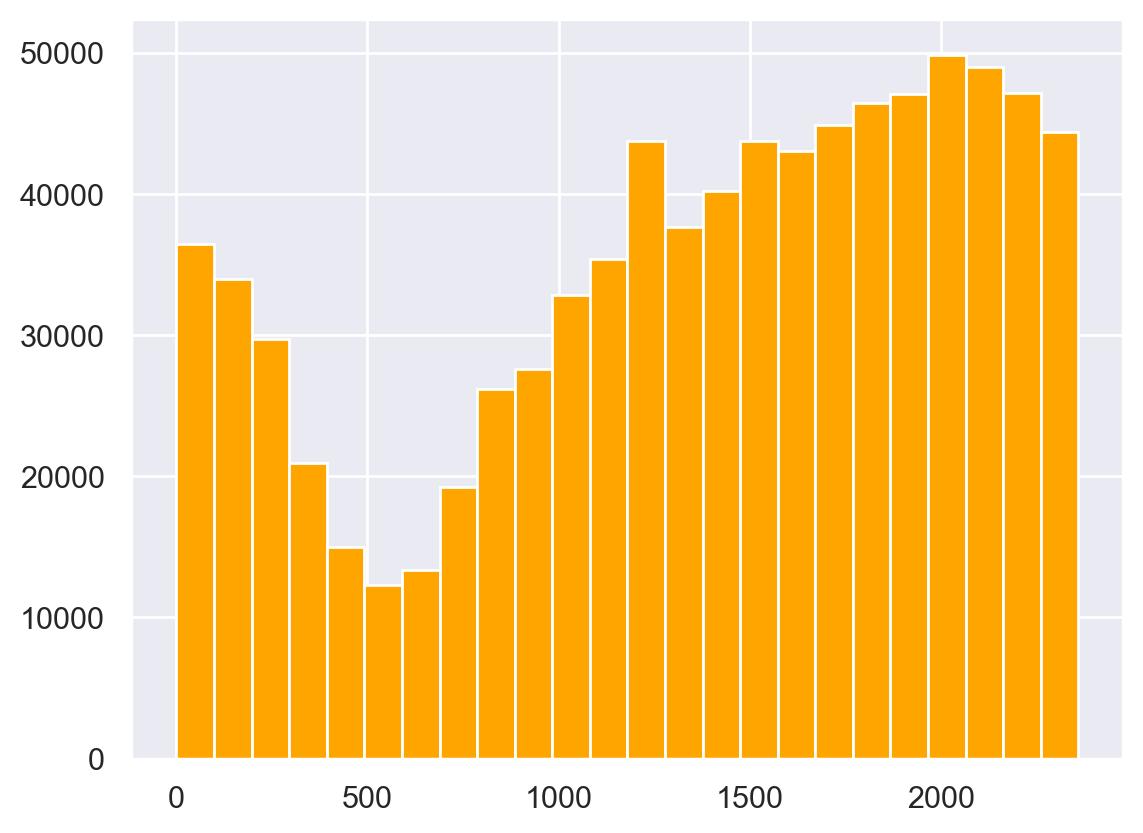

In [399]:
combined_reports['Time Occured'].hist(bins = 24)   

The histogram shows the obvious. Times are not converted into military time and therefore we have a lot of values under 1000 (in our case 10am). To ensure clean data, let's see how many entries we have between midnight and 10 am and convert all time into militray time. Looking closer at the column, it is also easy to create a new column called Weekday, giving us the name of the weekday.

In [400]:
count_values_0_to_1000 = combined_reports.loc[(combined_reports['Time Occured'] >= 0) & (combined_reports['Time Occured'] <= 100), 'Time Occured'].count()
print("Number of occurrences between 0 and 1000:", count_values_0_to_1000)
filtered_values_0_to_1000 = combined_reports.loc[(combined_reports['Time Occured'] >= 0) & (combined_reports['Time Occured'] <= 100)]

#Change to military time format
combined_reports['Time Occured'] = combined_reports['Time Occured'].apply(lambda x: f"{x:04d}"[:2] + ":" + f"{x:04d}"[2:])


Number of occurrences between 0 and 1000: 47923


In [401]:
combined_reports.head()

,Date Occured,Time Occured,Area Name,Zone,Crime Code,year,month,day,Weekday,Crime Code Description,Vict Age,Crime Category,Vict Sex,Vict Descent,Premis Code,Premis Group,Premis Desc,Weapon Category,Weapon Used Cd,Weapon Desc,Status,Status Desc,Location,Cross Street,Lat,Lon
4,2010-01-02,21:00,Central,Hollywood/Greater Downtown Area,122,2010,1,2,Saturday,"RAPE, ATTEMPTED",47,Sexual Offenses,F,H,103.0,Street/Outdoor,ALLEY,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488
7,2010-01-08,21:00,Central,Hollywood/Greater Downtown Area,230,2010,1,8,Friday,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,Assault & Battery,M,B,710.0,Other Premise,OTHER PREMISE,Other Object,500,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,500 CROCKER ST,NaN,34.0435,-118.2427
8,2010-01-09,02:30,Central,Hollywood/Greater Downtown Area,230,2010,1,9,Saturday,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30,Assault & Battery,M,H,108.0,Street/Outdoor,PARKING LOT,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 W OLYMPIC BL,NaN,34.0450,-118.2640
10,2010-01-14,14:45,Central,Hollywood/Greater Downtown Area,624,2010,1,14,Thursday,BATTERY - SIMPLE ASSAULT,38,Assault & Battery,F,B,101.0,Street/Outdoor,STREET,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,900 N BROADWAY,NaN,34.0640,-118.2375
11,2010-01-14,20:00,Central,Hollywood/Greater Downtown Area,210,2010,1,14,Thursday,ROBBERY,40,Robbery & Burglary,M,H,101.0,Street/Outdoor,STREET,Strong-Arm,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,ALAMEDA ST,7TH ST,34.0350,-118.2386


## Cleaning the Victim Age column
As before with our Time Occurred column, we see that there are no missing values for the age column. However, looking at the dataframe I was able to see some entries having a 0 in the age column. This could simply mean that there was no age data available. To ensure that this does not affect our prediction, I will proceed to analyze this column further.

<Figure size 1000x600 with 0 Axes>

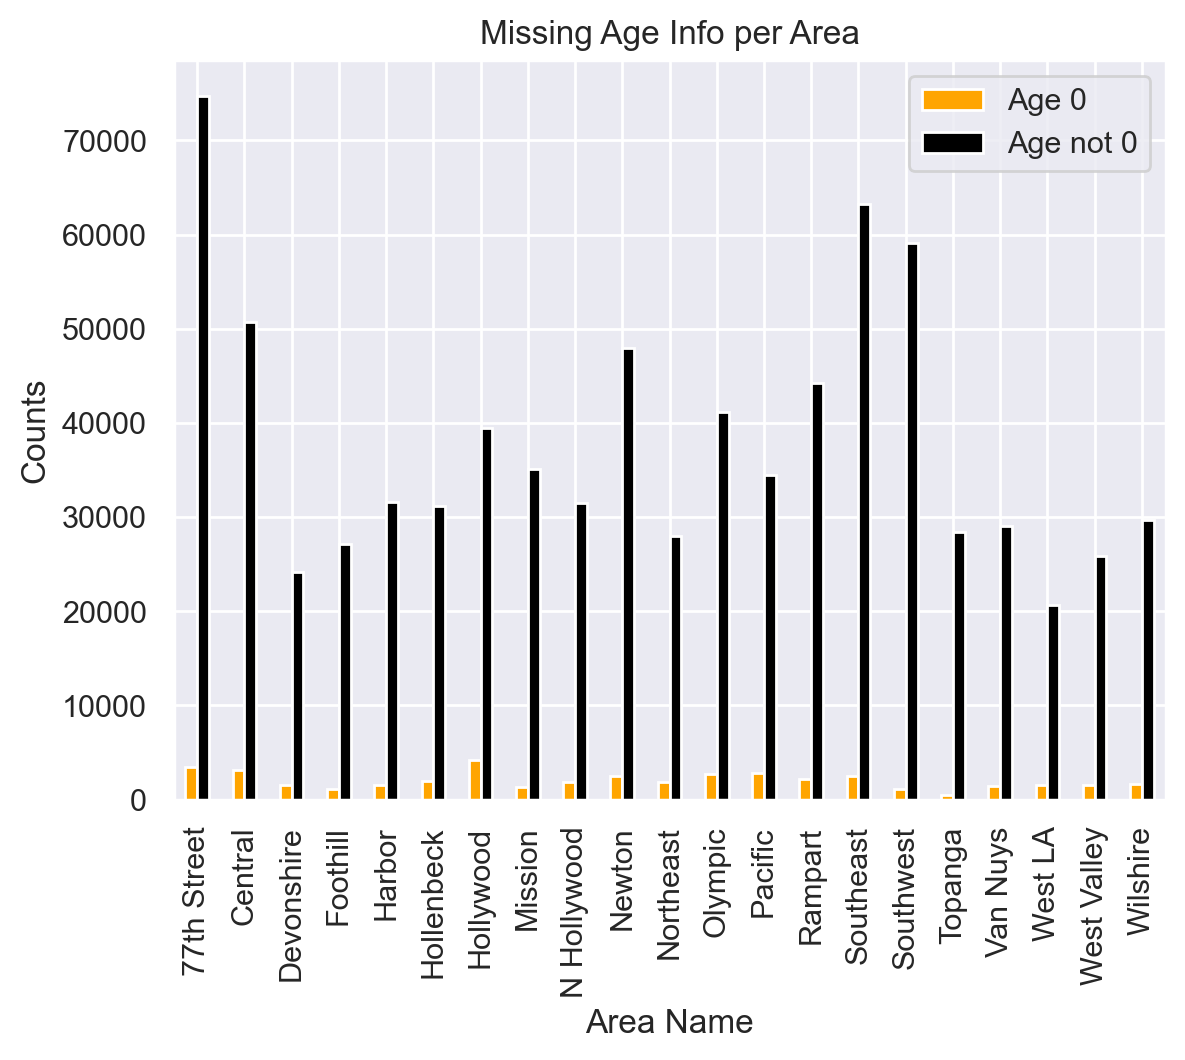

Number of records with age 0: 42858
Number of missing values in the age column: 0
Number of available age info not 0 in the column: 797429
Percentage of records with age 0: 5.10%


In [402]:
age_zero = combined_reports[combined_reports['Vict Age']==0]
age_not_zero = combined_reports[combined_reports['Vict Age'] != 0]

zero_counts = age_zero['Area Name'].value_counts()
not_zero_counts = age_not_zero['Area Name'].value_counts()

counts = pd.DataFrame({'Age 0': zero_counts, 'Age not 0': not_zero_counts})
plt.figure(figsize=(10,6))
counts.plot(kind ='bar')
plt.title("Missing Age Info per Area")
plt.xlabel('Area Name')
plt.ylabel('Counts')
plt.show()

null = (combined_reports['Vict Age'] == 0).sum()
print(f"Number of records with age 0: {null}")

missing_age = combined_reports['Vict Age'].isnull().sum()
print(f"Number of missing values in the age column: {missing_age}")

age_info = (combined_reports['Vict Age'] != 0).sum()
print(f"Number of available age info not 0 in the column: {age_info}")
total_records = combined_reports.shape[0]

percentage_age_zero = (null / total_records) * 100
print(f"Percentage of records with age 0: {percentage_age_zero:.2f}%")

## The age 0 problem
As we suspected, there are values that will negatively impact our data. While 5.67% is not a very big margin, it would be wasteful to just drop those missing values. I have two choices. Either replace the 0 values with random numbers from 18 to 99 or find out the mean age for each area. (I am using the Area Name column rather than the Zone column to have a very clear overview. I decide to go with the mean apporach.

In [403]:
filtered_reports = combined_reports[combined_reports['Vict Age'] != 0]

mean_ages_by_area = filtered_reports.groupby('Area Name')['Vict Age'].mean().round().reset_index()
mean_ages_by_area.rename(columns={'Vict Age': 'Mean Age'}, inplace=True)

print(mean_ages_by_area.sort_values(by='Mean Age', ascending=False))

      Area Name  Mean Age
1       Central      39.0
18      West LA      39.0
12      Pacific      38.0
20     Wilshire      37.0
19  West Valley      36.0
17     Van Nuys      36.0
16      Topanga      36.0
11      Olympic      36.0
10    Northeast      36.0
8   N Hollywood      36.0
2    Devonshire      36.0
6     Hollywood      35.0
13      Rampart      35.0
5    Hollenbeck      35.0
4        Harbor      35.0
3      Foothill      35.0
0   77th Street      35.0
9        Newton      34.0
14    Southeast      34.0
15    Southwest      34.0
7       Mission      33.0


<Figure size 1000x600 with 0 Axes>

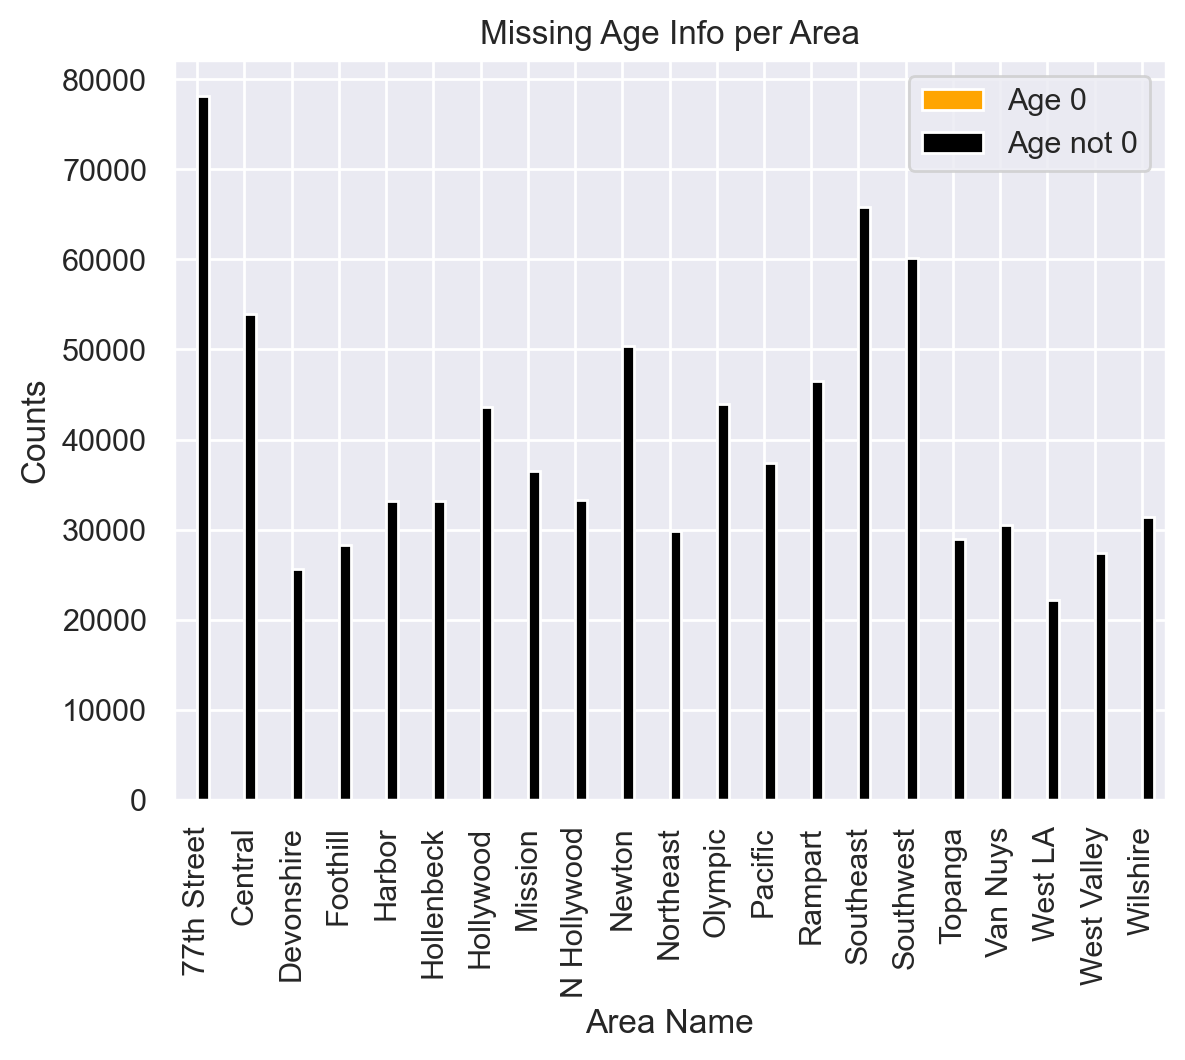

Number of records with age 0: 0
Number of missing values in the age column: 0
Number of available age info not 0 in the column: 840287
Percentage of records with age 0: 0.00%


In [404]:
combined_reports = pd.merge(combined_reports, mean_ages_by_area, on='Area Name', how='left')

combined_reports['Vict Age'] = combined_reports.apply(
    lambda row: row['Mean Age'] if row['Vict Age'] == 0 else row['Vict Age'],
    axis=1
)

combined_reports.drop(columns=['Mean Age'], inplace=True)

age_zero = combined_reports[combined_reports['Vict Age']==0]
age_not_zero = combined_reports[combined_reports['Vict Age'] != 0]

zero_counts = age_zero['Area Name'].value_counts()
not_zero_counts = age_not_zero['Area Name'].value_counts()

counts = pd.DataFrame({'Age 0': zero_counts, 'Age not 0': not_zero_counts})
plt.figure(figsize=(10,6))
counts.plot(kind ='bar')
plt.title("Missing Age Info per Area")
plt.xlabel('Area Name')
plt.ylabel('Counts')
plt.show()

null = (combined_reports['Vict Age'] == 0).sum()
print(f"Number of records with age 0: {null}")

missing_age = combined_reports['Vict Age'].isnull().sum()
print(f"Number of missing values in the age column: {missing_age}")

age_info = (combined_reports['Vict Age'] != 0).sum()
print(f"Number of available age info not 0 in the column: {age_info}")
total_records = combined_reports.shape[0]

percentage_age_zero = (null / total_records) * 100
print(f"Percentage of records with age 0: {percentage_age_zero:.2f}%")

## Cleaning the victim columns

In [405]:
descent = combined_reports['Vict Descent'].value_counts()
print(descent)

Vict Descent
H    395811
B    196255
W    144539
O     55683
X     26606
A     16759
K      2996
F       661
I       241
C       159
J        76
P        66
G        52
V        46
U        45
Z        32
S        13
D         9
L         5
Name: count, dtype: int64


I am only interested in the main 5 being: Hispanic, White, Black, Asian and Other

In [406]:
main5 =['H','W','A','B','O']
combined_reports = combined_reports[combined_reports['Vict Descent'].isin(main5)]
descent = combined_reports['Vict Descent'].value_counts()
print(descent)

Vict Descent
H    395811
B    196255
W    144539
O     55683
A     16759
Name: count, dtype: int64


In [407]:
vict_sex = combined_reports['Vict Sex'].value_counts()
print(vict_sex)

Vict Sex
F    418725
M    390114
X       156
H        49
N         3
Name: count, dtype: int64


Filtering for M and F (Male and Female)

In [408]:
main_sex =['M','F']
combined_reports = combined_reports[combined_reports['Vict Sex'].isin(main_sex)]
ms = combined_reports['Vict Sex'].value_counts()
print(ms)

Vict Sex
F    418725
M    390114
Name: count, dtype: int64


## Checking the missing values again
After all this wrangling, the dataframe is almost suitable for the next step. I will remove the cross street column and drop all other missing values to ensure clean data.

In [409]:
#show the list of missing values
missing_values = pd.concat([combined_reports.isnull().sum(), 100 * combined_reports.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)

,count,%
Cross Street,597036,73.813948
Premis Desc,128,0.015825
Status,1,0.000124
Weapon Desc,1,0.000124
Date Occured,0,0.000000
Time Occured,0,0.000000
Lat,0,0.000000
Location,0,0.000000
Status Desc,0,0.000000
Weapon Used Cd,0,0.000000


In [410]:
combined_reports = combined_reports.drop(columns =['Cross Street'])
combined_reports = combined_reports.dropna()

In [411]:
missing_values = pd.concat([combined_reports.isnull().sum(), 100 * combined_reports.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)

,count,%
Date Occured,0,0.0
Vict Descent,0,0.0
Lat,0,0.0
Location,0,0.0
Status Desc,0,0.0
Status,0,0.0
Weapon Desc,0,0.0
Weapon Used Cd,0,0.0
Weapon Category,0,0.0
Premis Desc,0,0.0


## Data from 2010 to 2023
Lastly, since this project has been started in April of 2024, we cannot take the year 2024 into account and therefore have to remove any enrty that has been made after 31/12/23.

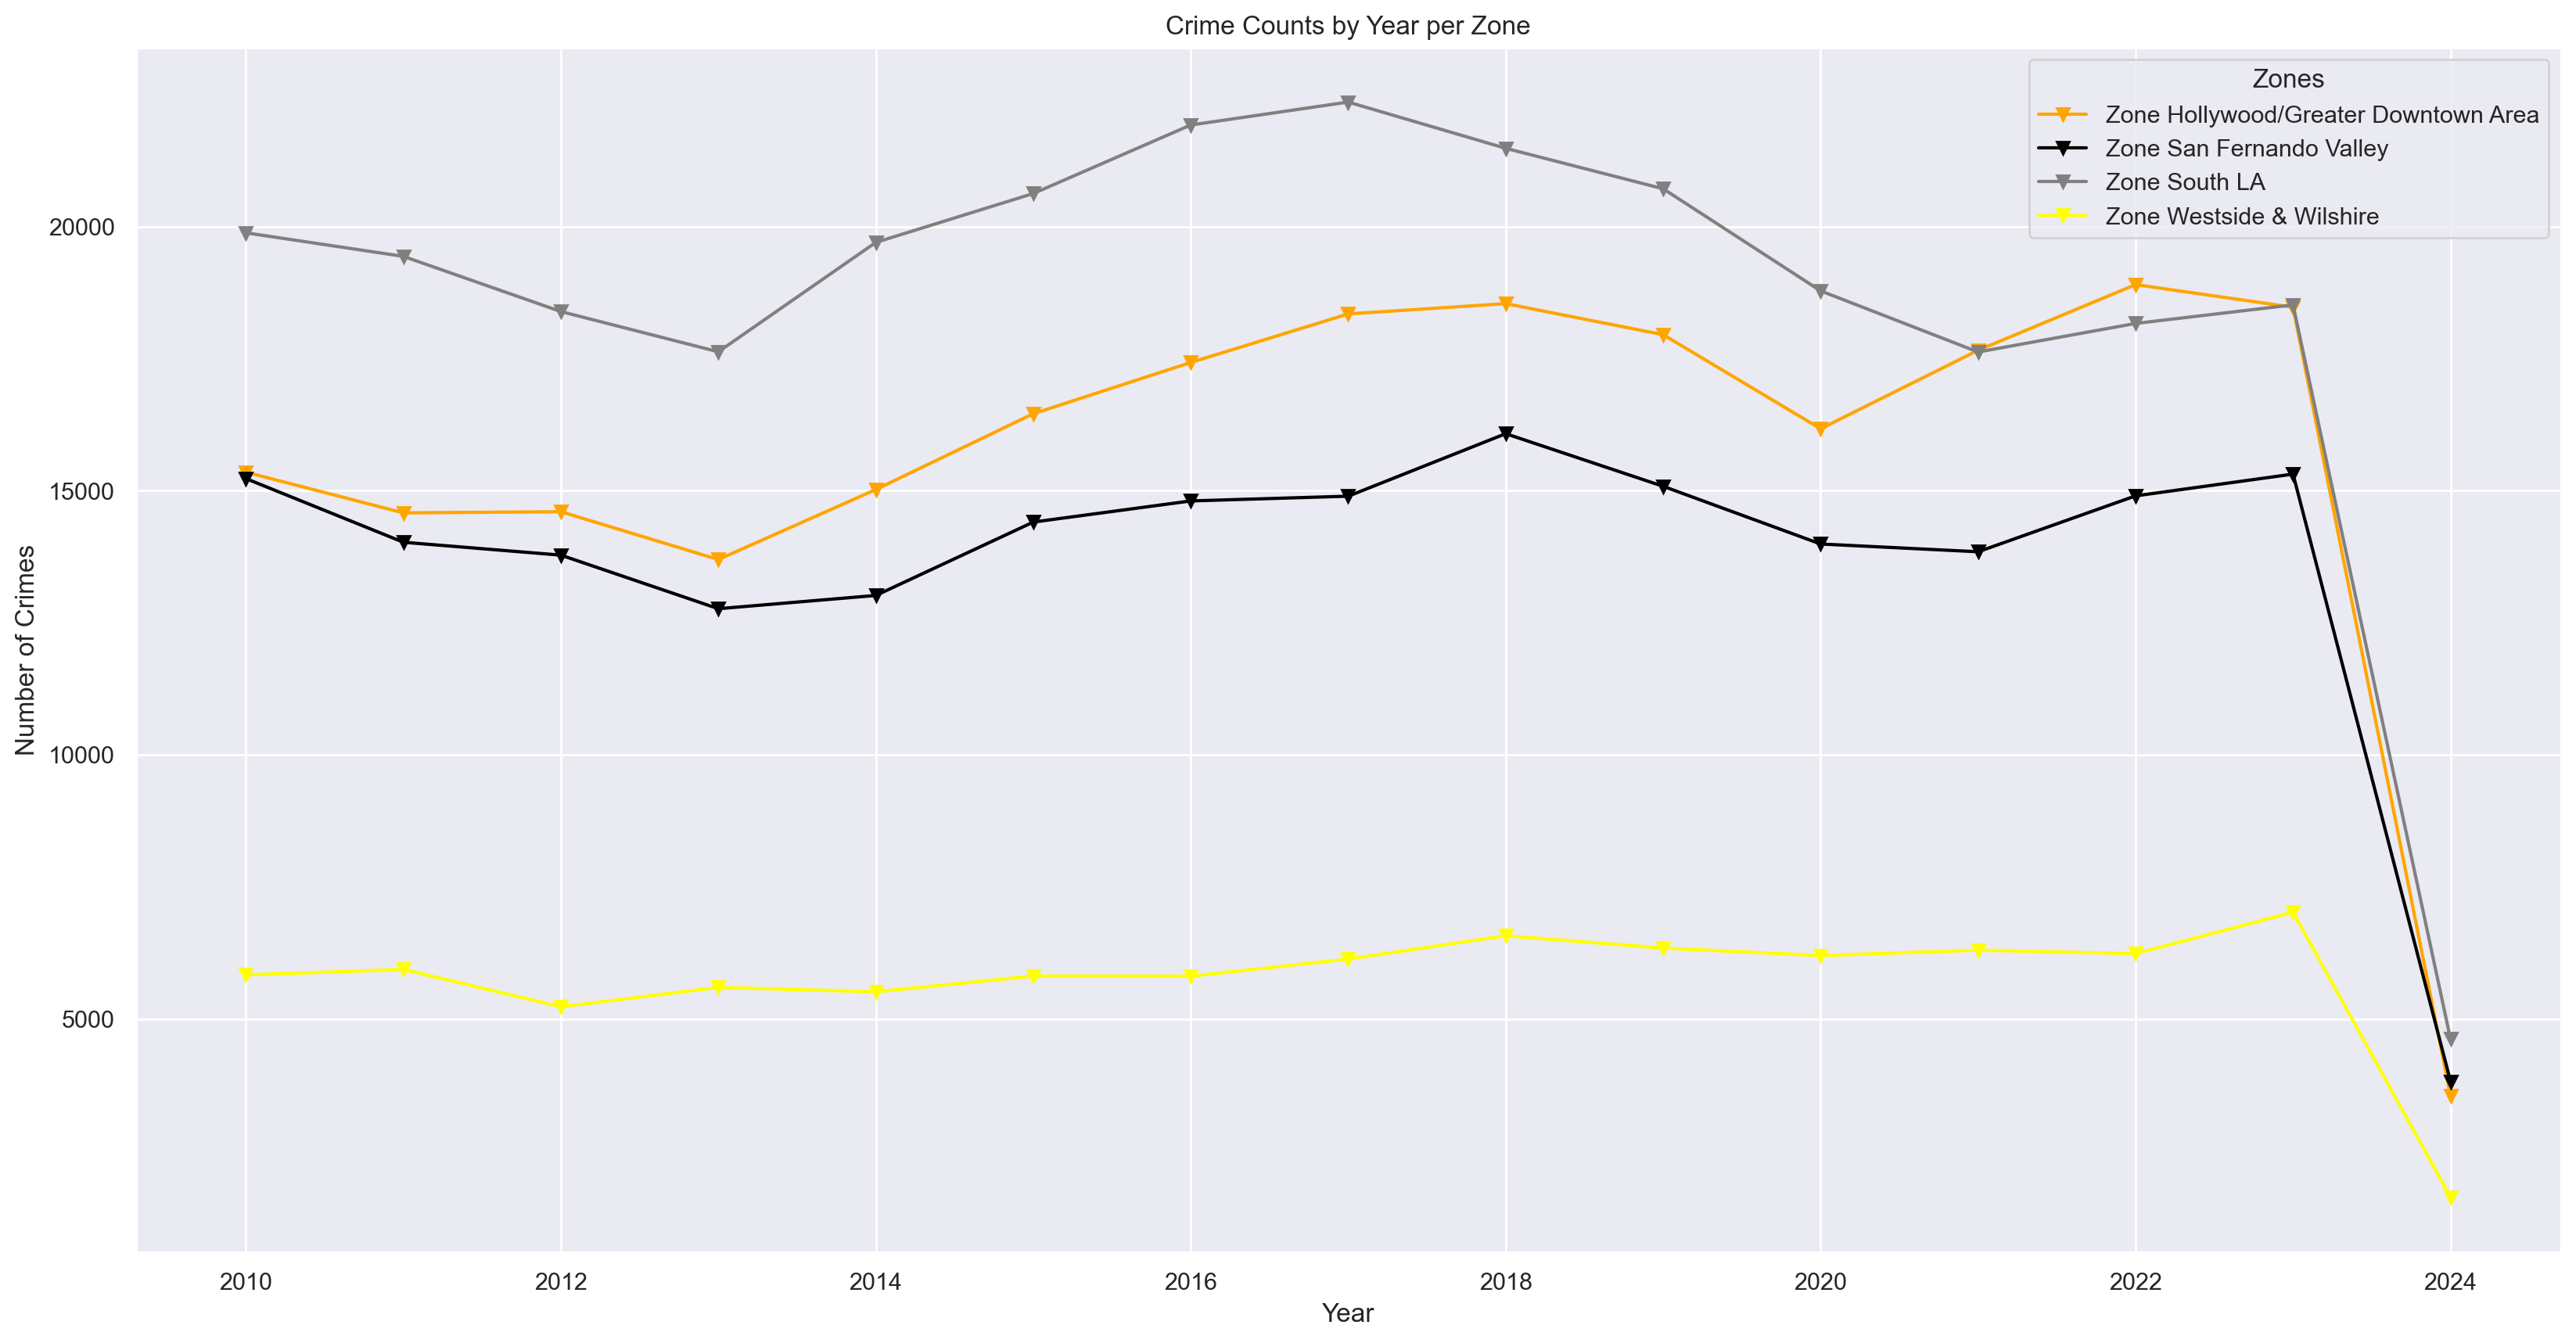

In [412]:
# Next I evaluate the timespan of all crimes to ensure that we have good dates for each year

crime_counts = combined_reports.groupby(['year', 'Zone']).size().unstack(fill_value=0)

# Plot data
plt.figure(figsize=(20, 10))
for zone in crime_counts.columns:
    plt.plot(crime_counts.index, crime_counts[zone], marker='v', label=f'Zone {zone}')

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by Year per Zone')
plt.legend(title='Zones')
plt.grid(True)

# Display the plot
plt.show()

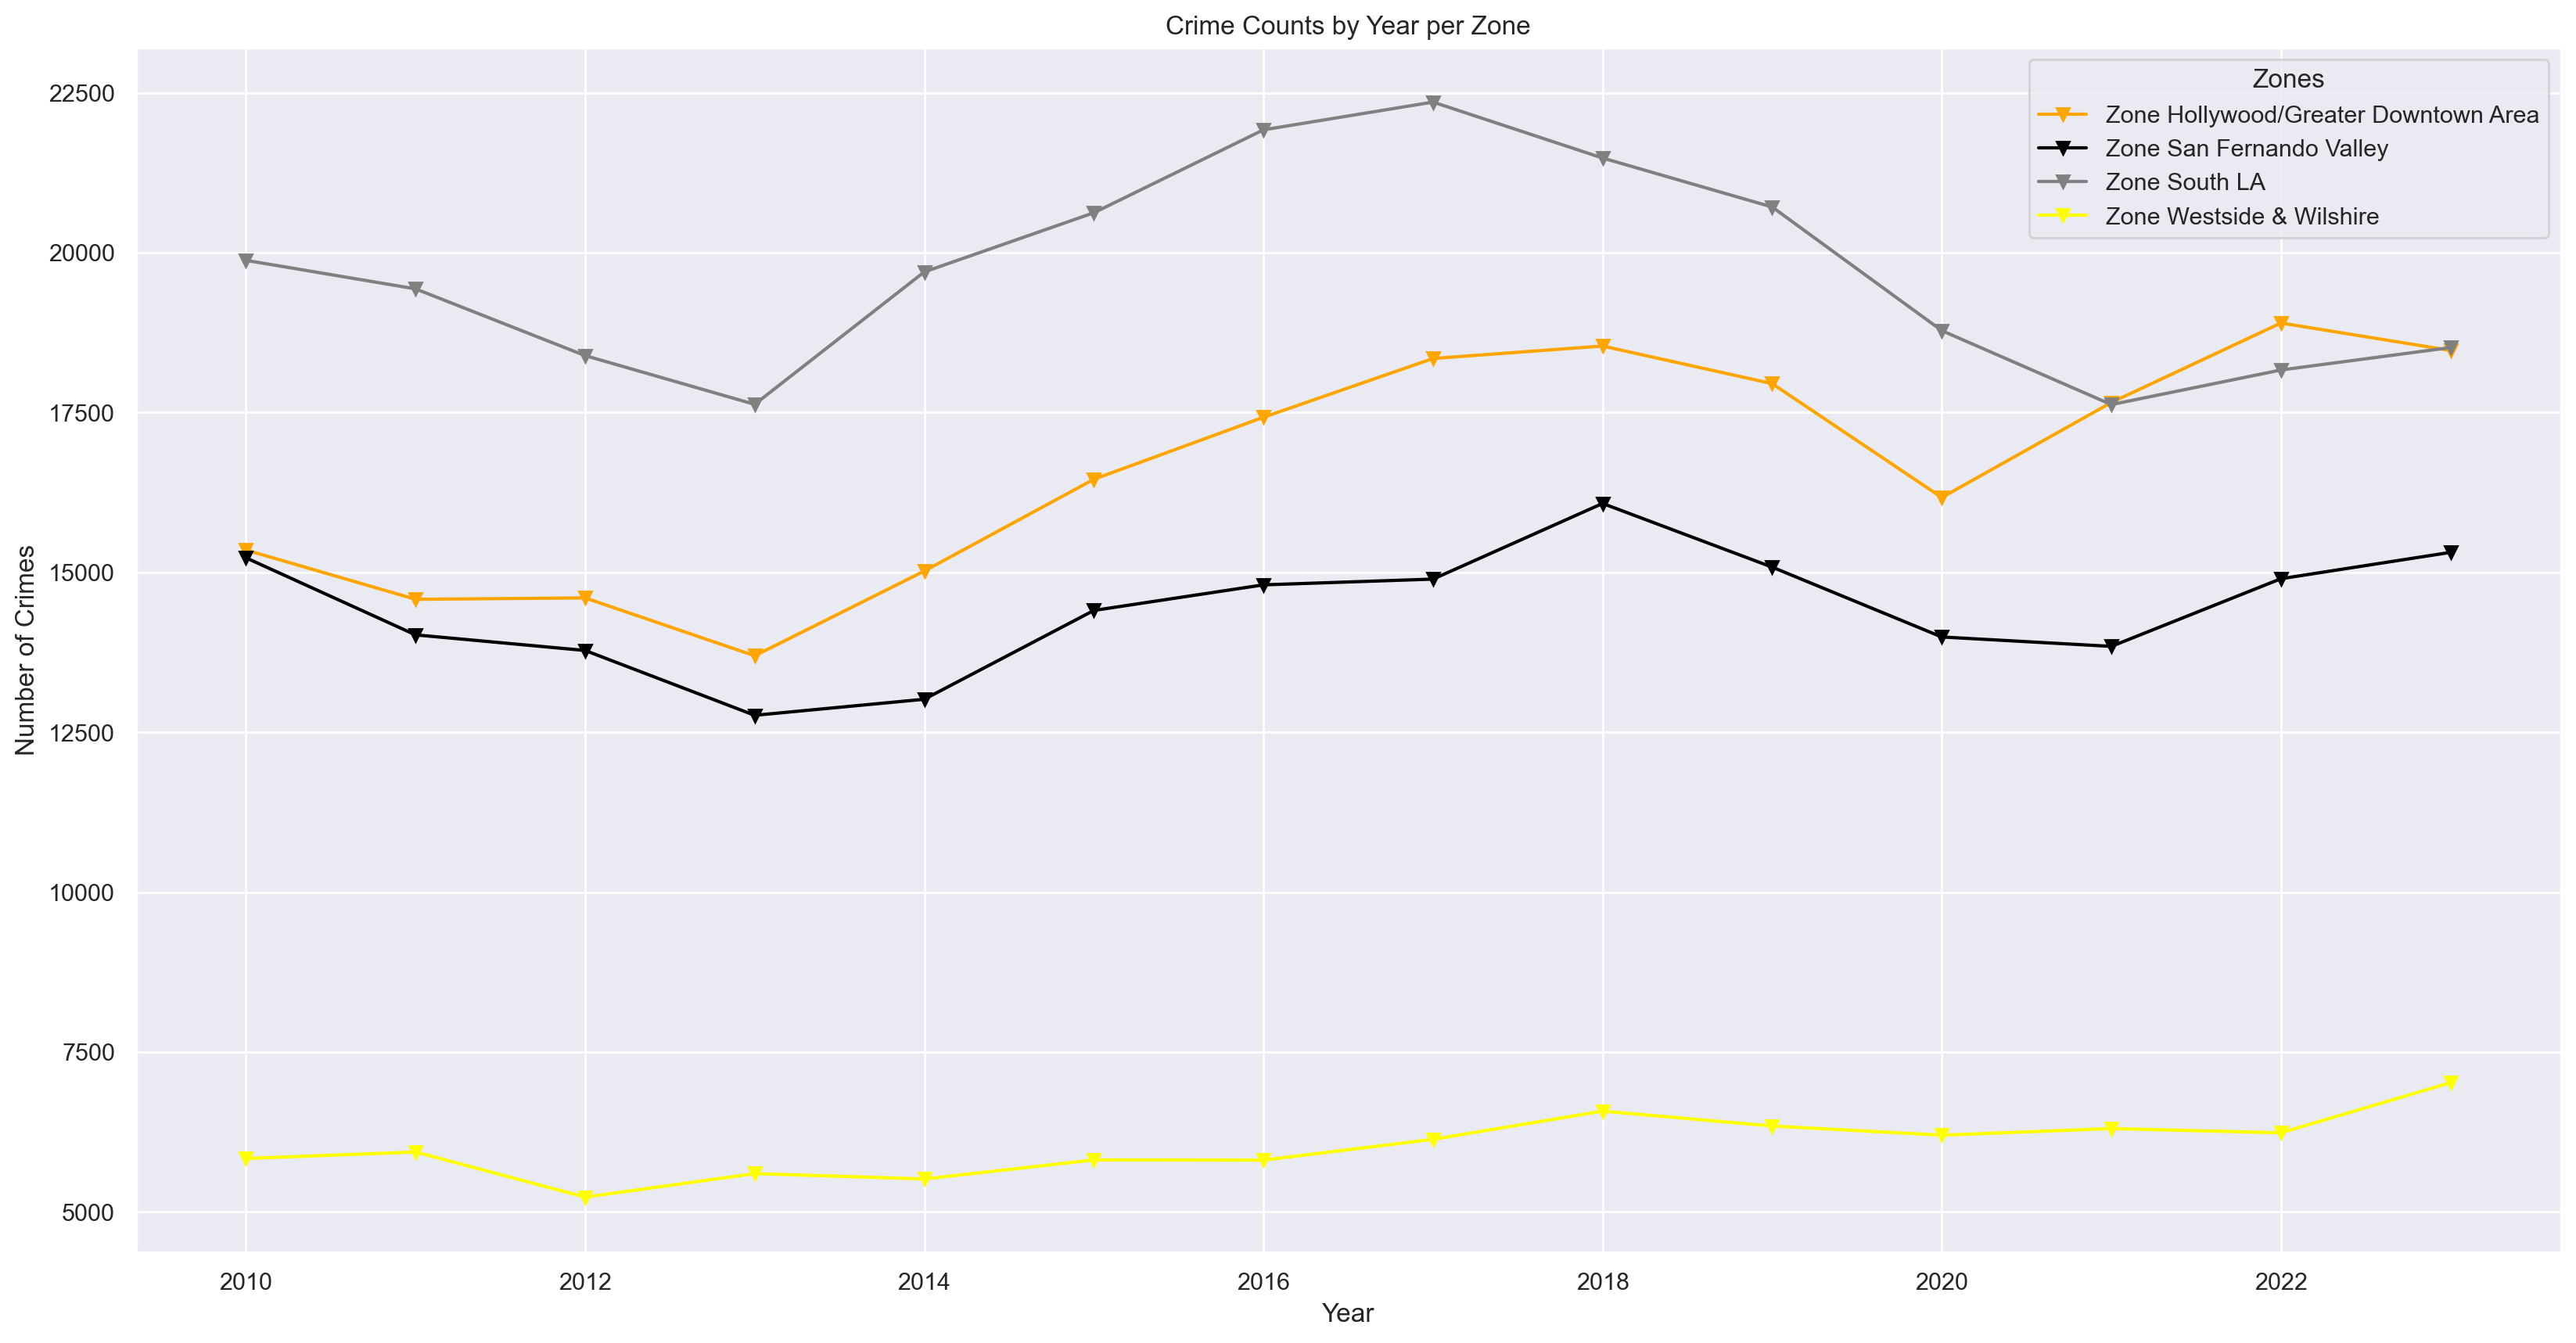

In [413]:
# Interesting enough we see a huge drop in data quality towards the beginning of 2023. We adjust our data 
# to only keep all reported crimes until 12/31/2022

combined_reports = combined_reports[combined_reports['Date Occured']<= '2023-12-31']

crime_counts2 = combined_reports.groupby(['year', 'Zone']).size().unstack(fill_value=0)

# Plot data
plt.figure(figsize=(20, 10))
for zone in crime_counts2.columns:
    plt.plot(crime_counts2.index, crime_counts2[zone], marker='v', label=f'Zone {zone}')

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by Year per Zone')
plt.legend(title='Zones')
plt.grid(True)

# Display the plot
plt.show()

In [414]:
combined_reports.shape

(795096, 25)

In [415]:
#Save DataFrame to csv file

combined_reports.to_csv('Crime_LA_2010_2023.csv', index = False)